In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('experience_salary_dataset.csv')

In [5]:
df.head()

,Experience,Salary
0,1,20
1,2,26
2,3,24
3,4,31
4,5,30


C:\Users\DELL ADMIN\AppData\Local\Temp\ipykernel_1936\3145365343.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


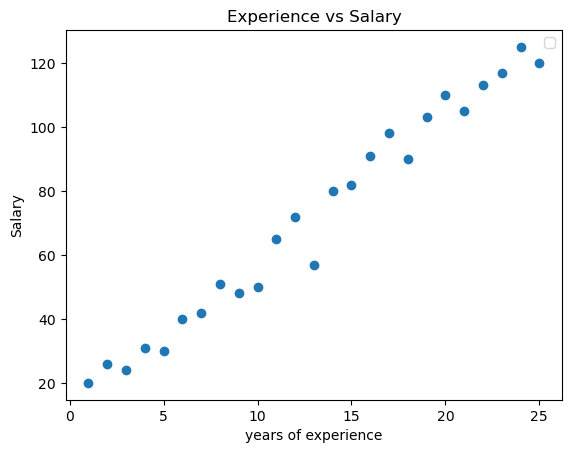

In [6]:
plt.scatter(df['Experience'], df['Salary'])
plt.xlabel('years of experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.legend()
plt.show()

In [7]:
# diving the dataset into dependent and independent features
X = df[['Experience']] # independent feature
y = df['Salary'] # dependent feature

In [8]:
X.head()

,Experience
0,1
1,2
2,3
3,4
4,5


In [9]:
X.shape

(25, 1)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
X_train.shape,X_test.shape

((18, 1), (7, 1))

In [12]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train

array([[-1.51235569],
       [ 1.31769605],
       [-0.97329822],
       [-1.37759132],
       [-0.02994764],
       [ 0.37434547],
       [-1.24282695],
       [-1.10806258],
       [ 1.04816731],
       [ 0.6438742 ],
       [ 1.18293168],
       [ 0.77863857],
       [ 1.58722478],
       [-0.70376948],
       [-0.29947637],
       [ 0.2395811 ],
       [ 0.91340294],
       [-0.83853385]])

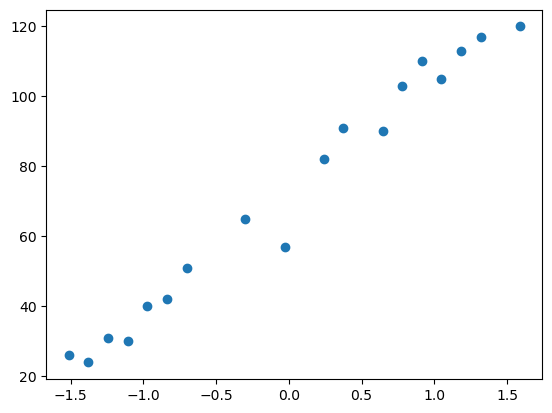

In [14]:
plt.scatter(X_train,y_train)
plt.show()

In [15]:
# train the model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [16]:
print("Slope or coffient of experience: ",regression.coef_)
print("intercept: ",regression.intercept_)

Slope or coffient of experience:  [33.62953306]
intercept:  72.05555555555556


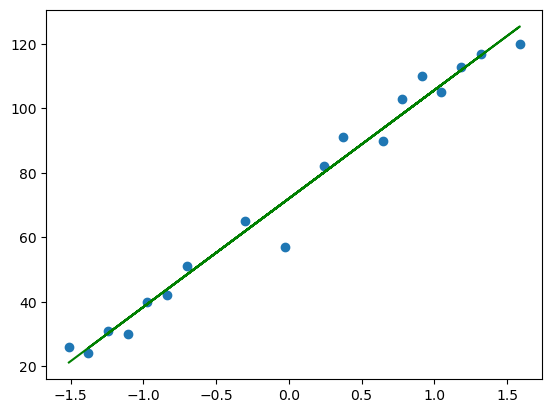

In [17]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='Green')
plt.show()

In [18]:
#predicting on test data
y_test_predict = regression.predict(X_test)
y_test_predict,y_test 

(array([ 52.92017937,  89.17668161,  16.66367713, 120.90112108,
         66.51636771,  57.45224215,  75.58049327]),
 8      48
 16     98
 0      20
 23    125
 11     72
 9      50
 13     80
 Name: Salary, dtype: int64)

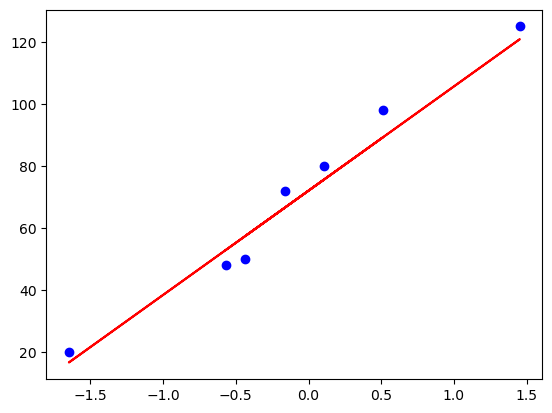

In [19]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,y_test_predict,color='red')
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [21]:
mae = mean_absolute_error(y_test,y_test_predict)
mse = mean_squared_error(y_test,y_test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_test_predict)
print("mean absolute error: ",mae)
print("mean squared error: ",mse)
print("roor mean squared error: ",rmse)
print("r2 score: ",r2)

mean absolute error:  5.5048686739269685
mean squared error:  33.58987813951617
roor mean squared error:  5.795677539297383
r2 score:  0.9677716070327728


In [22]:
## predciting the salary of employee with experience
emp_experience = input("Enter the expericence to predict salary: ")
print("The predicted salary is: ",regression.predict(scaler.transform([[emp_experience]])))

The predicted salary is:  [32.52589686]


c:\Users\DELL ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


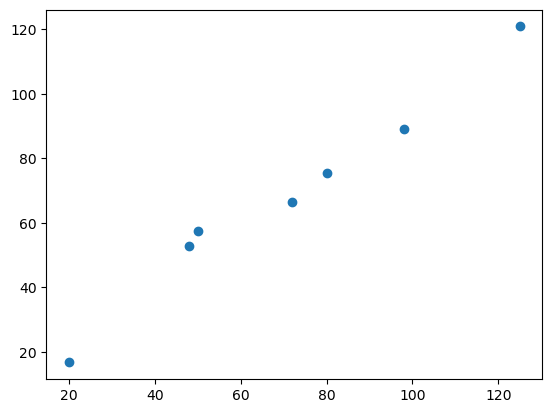

In [23]:
## assumptions
plt.scatter(y_test,y_test_predict)
plt.show()

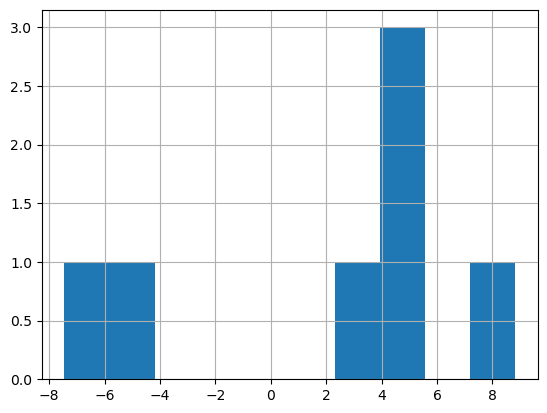

In [24]:
residuals = y_test - y_test_predict
residuals.hist()
plt.show()

C:\Users\DELL ADMIN\AppData\Local\Temp\ipykernel_1936\3953023317.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


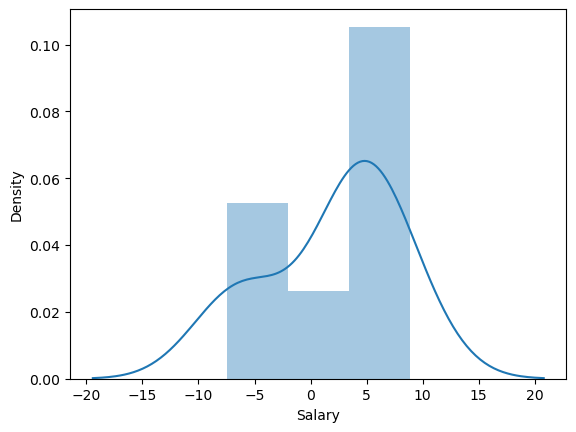

In [26]:
sns.distplot(residuals,kde=True)
plt.show() # if it is a normal distribution then our model is good

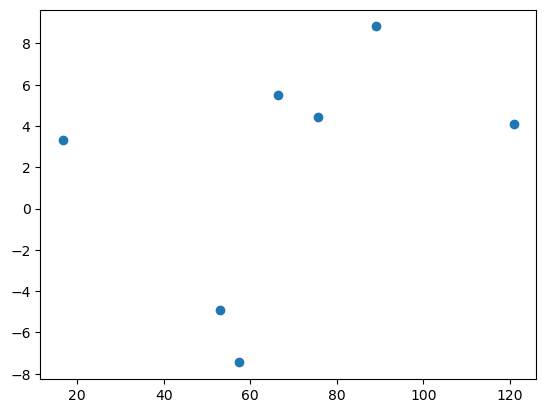

In [27]:
plt.scatter(y_test_predict,residuals)
plt.show()